# ❄ CO2 Emissions in Canada

---
## Justificativa da Escolha do Dataset
O Dataset "CO2 Emissions in Canada" foi escolhido para este projeto por sua aplicabilidade aos requisítos da análise estatística. A seguir vão algumas das principais razões pela escolha:

- Clara relação causa e efeito para regressão linear: Variável dependente clara e mensurável `CO2 Emissions (g/km)`.
- `Engine Size(L)`, `Cylinders` e `Fuel Comsumption Comb (L/100 km)` são preditores intuitivos e fortes, permitindo construção de um modelo robosto para prever as emissões.
- Presença de variáveis numéricas e categoricas para a análise.
- Potencial para Testes de Hipóteses Relevantes.
- Extração de Insights podem ser traduzidos facilmente em recomendações e práticas aplicáveis.

# Importação de Bibliotecas e Visão Geral do Dataset

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [137]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [138]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [139]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [141]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [142]:

new_columns = {
    'Make': 'marca',
    'Model': 'modelo',
    'Vehicle Class': 'classe_veiculo',
    'Engine Size(L)': 'tamanho_motor_l',
    'Cylinders': 'cilindros',
    'Transmission': 'transmissao',
    'Fuel Type': 'tipo_combustivel',
    'Fuel Consumption City (L/100 km)': 'consumo_cidade_l_100km',
    'Fuel Consumption Hwy (L/100 km)': 'consumo_estrada_l_100km',
    'Fuel Consumption Comb (L/100 km)': 'consumo_combinado_l_100km',
    'Fuel Consumption Comb (mpg)': 'consumo_combinado_mpg',
    'CO2 Emissions(g/km)': 'emissoes_co2_g_km'
}

df.rename(columns=new_columns, inplace=True)
df.head()


,marca,modelo,classe_veiculo,tamanho_motor_l,cilindros,transmissao,tipo_combustivel,consumo_cidade_l_100km,consumo_estrada_l_100km,consumo_combinado_l_100km,consumo_combinado_mpg,emissoes_co2_g_km
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [143]:
df['tipo_transmissao'] = df['transmissao'].apply(lambda x: 'Automatica' if x.startswith('A') else 'Manual')

Renomeando as colunas para um padrão mais limpo (snake_case) para facilitar a manipulação dos dados.

---

# Valores Únicos

In [144]:
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) < 50:
        print(f"Valores únicos na coluna '{column}':")
        print(unique_values)
        print("-" * 30)

Valores únicos na coluna 'marca':
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
------------------------------
Valores únicos na coluna 'classe_veiculo':
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
------------------------------
Valores únicos na coluna 'cilindros':
[ 4  6 12  8 10  3  5 16]
------------------------------
Valores únicos na coluna 'transmissao':
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 

# Verificação de Valores Nulos

In [145]:
df.isnull().sum()

marca                        0
modelo                       0
classe_veiculo               0
tamanho_motor_l              0
cilindros                    0
transmissao                  0
tipo_combustivel             0
consumo_cidade_l_100km       0
consumo_estrada_l_100km      0
consumo_combinado_l_100km    0
consumo_combinado_mpg        0
emissoes_co2_g_km            0
tipo_transmissao             0
dtype: int64

In [146]:
df.isna().sum()

marca                        0
modelo                       0
classe_veiculo               0
tamanho_motor_l              0
cilindros                    0
transmissao                  0
tipo_combustivel             0
consumo_cidade_l_100km       0
consumo_estrada_l_100km      0
consumo_combinado_l_100km    0
consumo_combinado_mpg        0
emissoes_co2_g_km            0
tipo_transmissao             0
dtype: int64

# Tratamento de Outliers

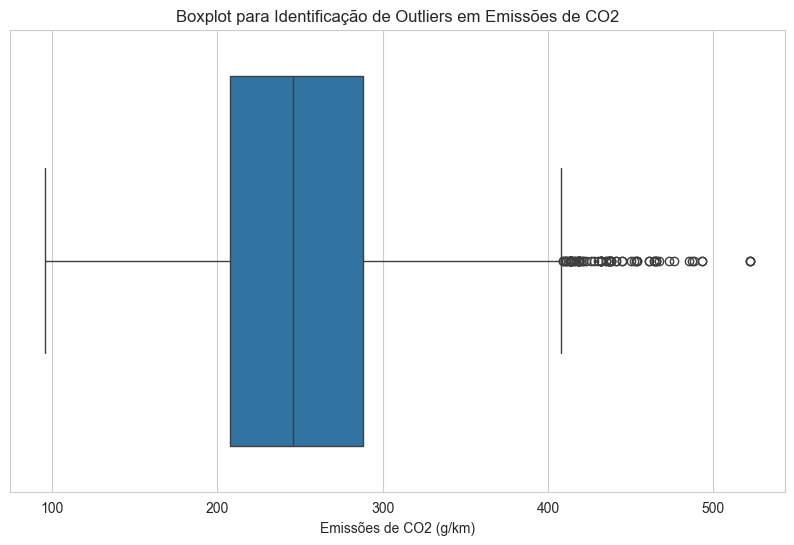

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['emissoes_co2_g_km'])
plt.title('Boxplot para Identificação de Outliers em Emissões de CO2')
plt.xlabel('Emissões de CO2 (g/km)')
plt.show()

A partir da plotagem do boxplot, identificou-se diversos pontos com valores acima de 400 g/km.

 outliers correspondem a veículos de supercarros e de alto luxo, como o Bugatti Chiron e o Lamborghini Aventador. Visto que estes são dados legítimos, foi tomada a decisão de manter todos os outliers no dataset para esta categoria.

In [148]:
Q1 = df['emissoes_co2_g_km'].quantile(0.25)
Q3 = df['emissoes_co2_g_km'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

print(f"O limite superior para um valor ser considerado outlier é: {limite_superior:.2f} g/km")

outliers_df = df[df['emissoes_co2_g_km'] > limite_superior]

print("\nCaracterísticas dos veículos considerados outliers:")
display(outliers_df[['marca', 'modelo', 'classe_veiculo', 'tamanho_motor_l', 'cilindros', 'emissoes_co2_g_km']].sort_values(by='emissoes_co2_g_km', ascending=False).head(10))


O limite superior para um valor ser considerado outlier é: 408.00 g/km

Características dos veículos considerados outliers:


,marca,modelo,classe_veiculo,tamanho_motor_l,cilindros,emissoes_co2_g_km
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,522
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,522
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,493
7059,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,493
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,488
6045,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,487
7058,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,485
2971,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12,476
5126,MERCEDES-BENZ,AMG G 65,SUV - STANDARD,6.0,12,473


---

# Gráficos Iniciais

Assimetria à Direita:  
A granda maioria dos veículos está concentrada em uma faixa entre aproximadamente 175 e 325 g/km. A maioria dos veículos possui um nível de emissão moderado, entretanto, existe um número significativo, embora menor, de veívulos que são altamente poluentes (emissões a mais de 400 g/km).

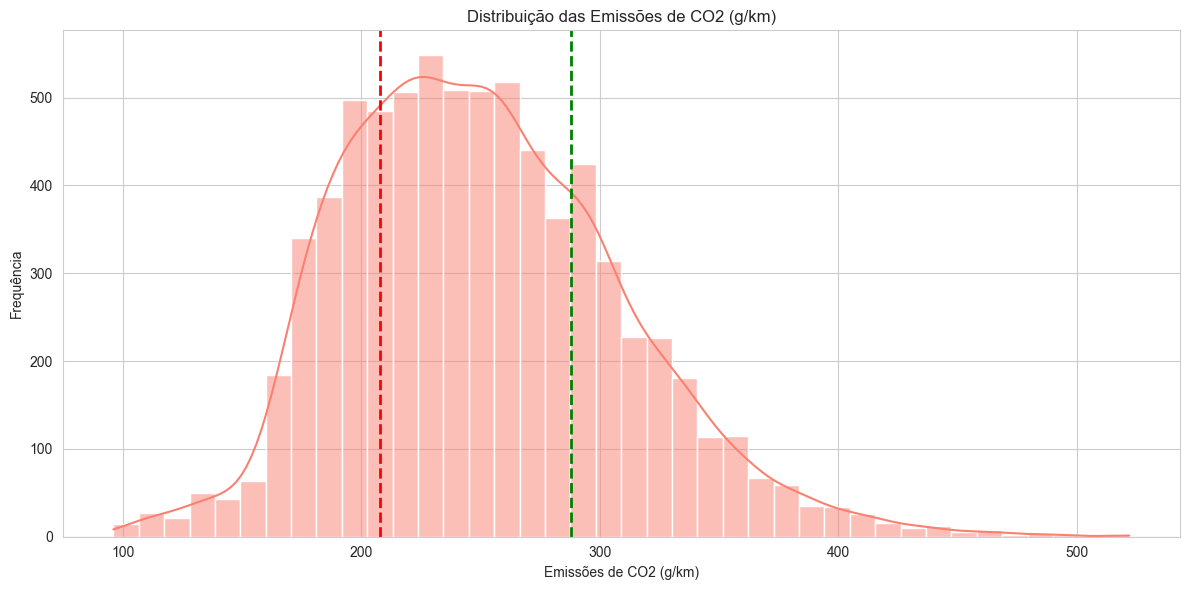

In [149]:
sns.set_style("whitegrid")

q1 = df['emissoes_co2_g_km'].quantile(0.25)
q3 = df['emissoes_co2_g_km'].quantile(0.75)

plt.figure(figsize=(12, 6))

sns.histplot(df['emissoes_co2_g_km'], bins=40, kde=True, color='salmon')

plt.axvline(x=q1, color='red', linestyle='--', linewidth=2, label=f'1° Quartil (Q1): {q1:.2f} g/km')
plt.axvline(x=q3, color='green', linestyle='--', linewidth=2, label=f'3° Quartil (Q3): {q3:.2f} g/km')
plt.title('Distribuição das Emissões de CO2 (g/km)')
plt.xlabel('Emissões de CO2 (g/km)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Distribuição Multimodal:
Os picos mais proeminentes estão localizados em 2.0L e 3.6L. O que indica que esses são possivelmente os "motores padrão" de veículos mais vendidos no Canáda.

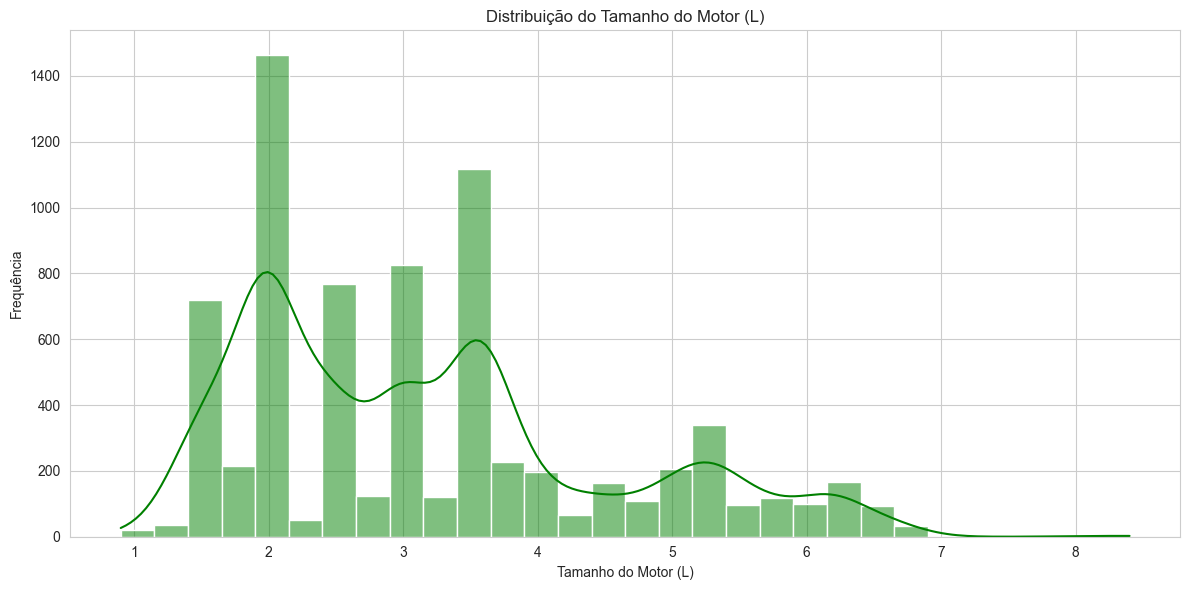

In [150]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(df['tamanho_motor_l'], kde=True, bins=30, color='green')
plt.title('Distribuição do Tamanho do Motor (L)')
plt.xlabel('Tamanho do Motor (L)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

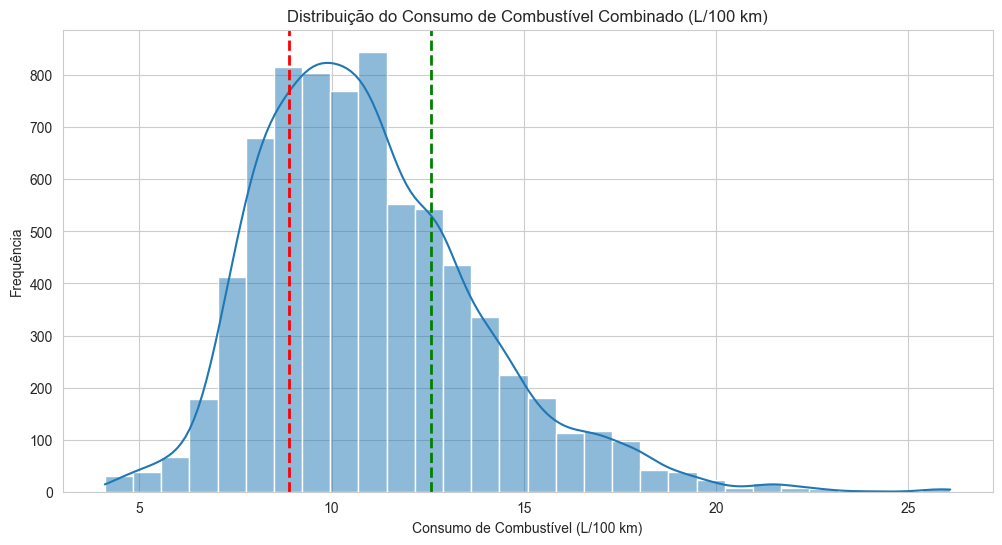

In [151]:
plt.figure(figsize=(12, 6))

q1 = df['consumo_combinado_l_100km'].quantile(0.25)
q3 = df['consumo_combinado_l_100km'].quantile(0.75)

sns.histplot(df['consumo_combinado_l_100km'], kde=True, bins=30)
plt.title('Distribuição do Consumo de Combustível Combinado (L/100 km)')
plt.axvline(x=q1, color='red', linestyle='--', linewidth=2, label=f'1° Quartil (Q1): {q1:.2f} L/100 km')
plt.axvline(x=q3, color='green', linestyle='--', linewidth=2, label=f'3° Quartil (Q3): {q3:.2f} L/100 km')
plt.xlabel('Consumo de Combustível (L/100 km)')
plt.ylabel('Frequência')
plt.show()

C:\Users\joaoc\AppData\Local\Temp\ipykernel_40012\996742944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_emission.values, y=average_emission.index, palette="viridis", errorbar=None, legend=False)


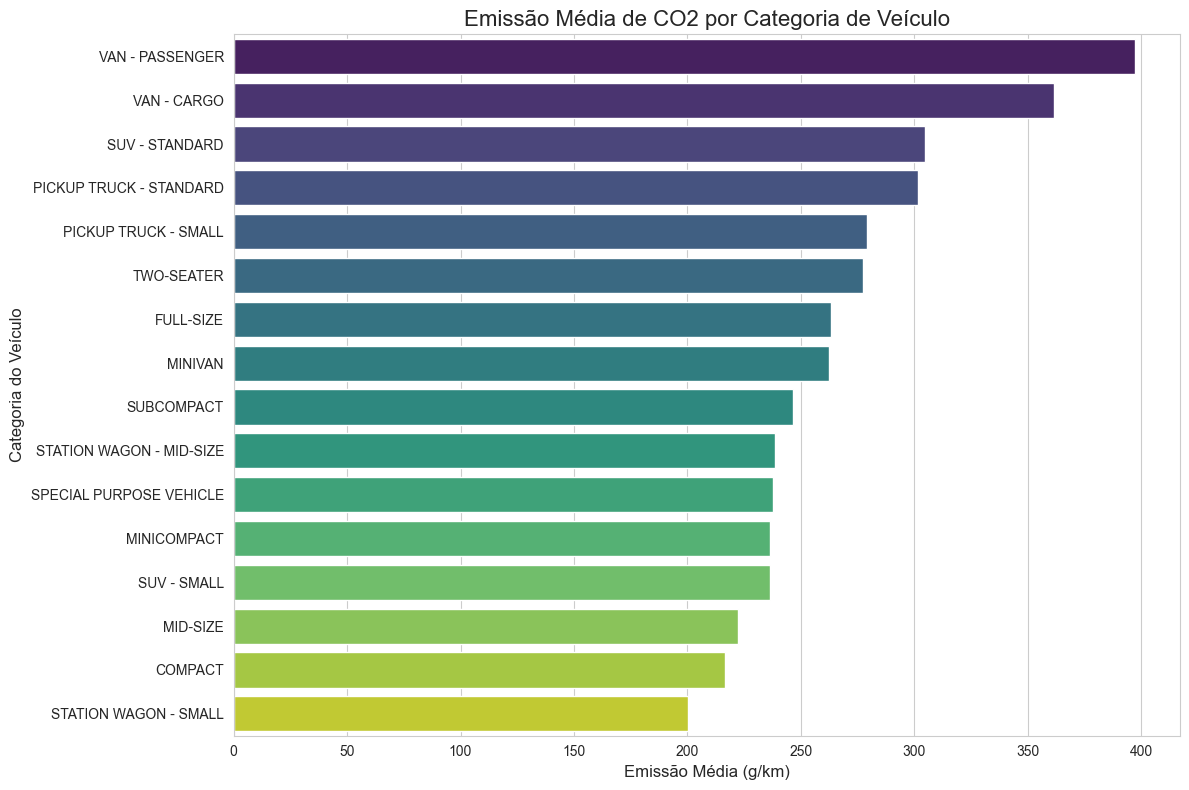

In [152]:
sns.set_style("whitegrid")

average_emission = df.groupby('classe_veiculo')['emissoes_co2_g_km'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_emission.values, y=average_emission.index, palette="viridis", errorbar=None, legend=False)

plt.title('Emissão Média de CO2 por Categoria de Veículo', fontsize=16)
plt.xlabel('Emissão Média (g/km)', fontsize=12)
plt.ylabel('Categoria do Veículo', fontsize=12)

plt.tight_layout()

plt.show()

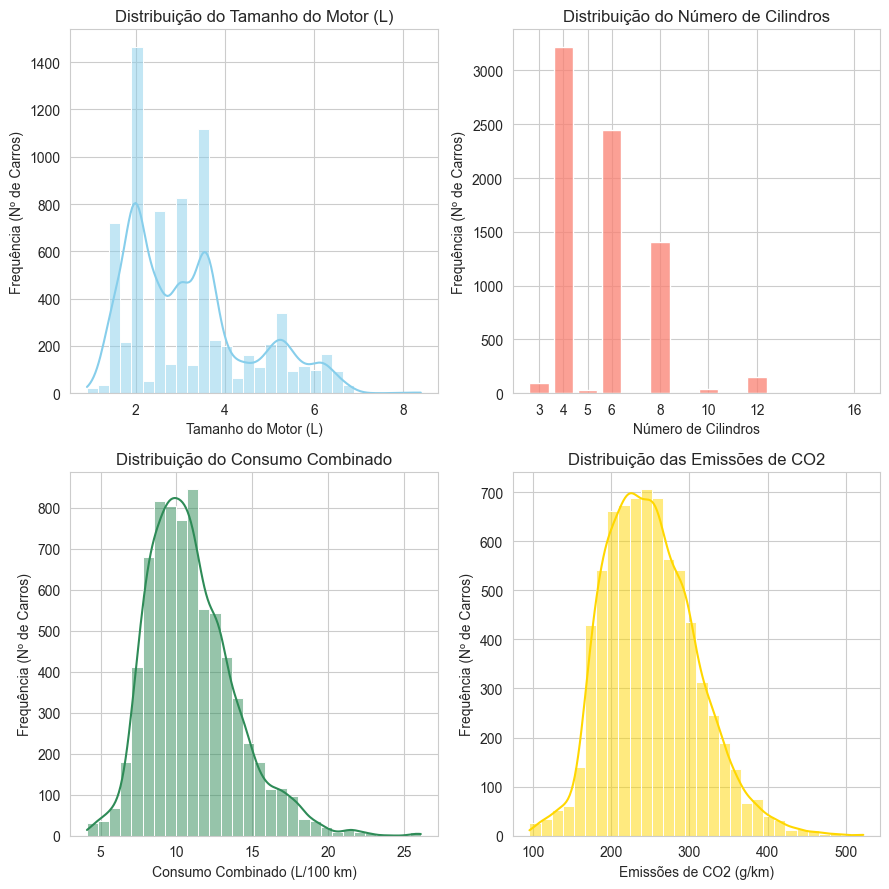

In [153]:
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1) 
sns.histplot(df['tamanho_motor_l'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição do Tamanho do Motor (L)')
plt.xlabel('Tamanho do Motor (L)')
plt.ylabel('Frequência (Nº de Carros)')

ax = plt.subplot(2, 2, 2) 
sns.histplot(df['cilindros'], discrete=True, color='salmon', shrink=0.8)
ax.set_xticks(sorted(df['cilindros'].unique())) # Garante que todos os n° de cilindros apareçam no eixo
plt.title('Distribuição do Número de Cilindros')
plt.xlabel('Número de Cilindros')
plt.ylabel('Frequência (Nº de Carros)')

plt.subplot(2, 2, 3) # P
sns.histplot(df['consumo_combinado_l_100km'], kde=True, bins=30, color='seagreen')
plt.title('Distribuição do Consumo Combinado')
plt.xlabel('Consumo Combinado (L/100 km)')
plt.ylabel('Frequência (Nº de Carros)')

plt.subplot(2, 2, 4) 
sns.histplot(df['emissoes_co2_g_km'], kde=True, bins=30, color='gold')
plt.title('Distribuição das Emissões de CO2')
plt.xlabel('Emissões de CO2 (g/km)')
plt.ylabel('Frequência (Nº de Carros)')

plt.tight_layout()

plt.show()

---

# Análise Exploratória Aprofundada e Geração de Insights

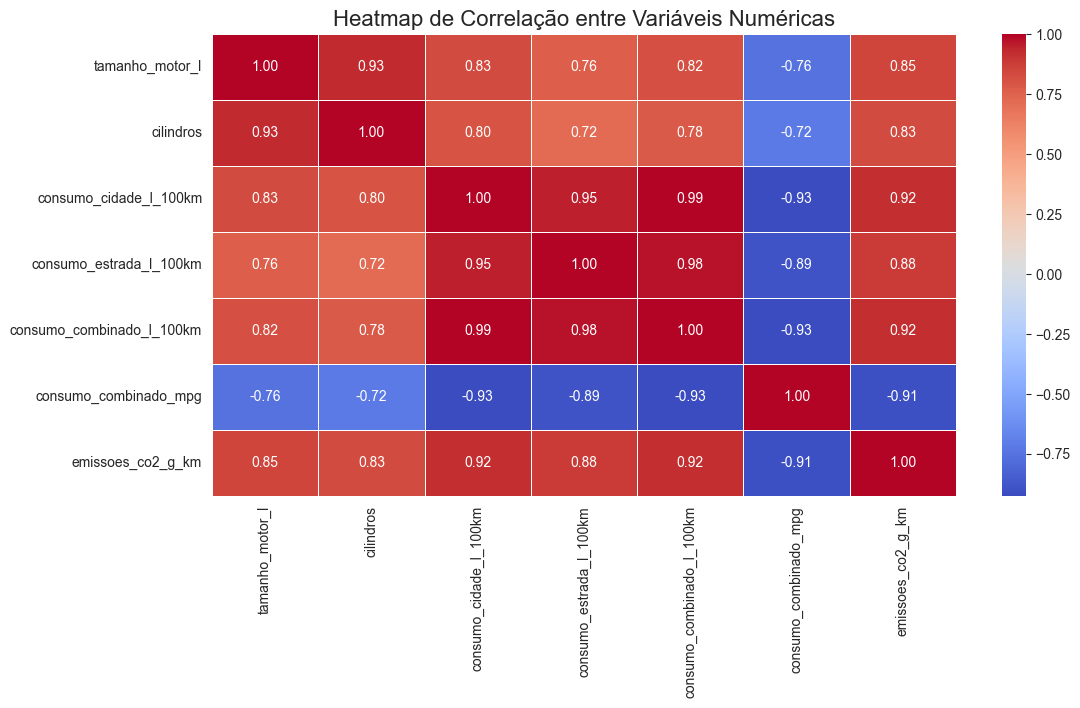

In [154]:
sns.set_style("whitegrid")

colunas_numericas = df.select_dtypes(include=['float64', 'int64'])

matriz_correlacao = colunas_numericas.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

consumo_combinado_l_100km (0.92): O consumo de combustível é o fator que mais diretamente gera emissões de CO2.

consumo_combinado_mpg (-0.91): Forte correlação negativa. O valor é próximo de -1.0, o que indica uma relação inversa quase perfeita.
Milhas por galão representa uma medida de "Eficiência". Quanto maior o MPG menor é o consumo de combustivel do carro. O que faz com que as emissões de CO2 sejam menores.

Variável dependente: emissoes_co2_g_km

Variáveis que possuem maior correlação com nossa variável dependente:
- consumo_combinado_l_100km (corr: 0.92)
- tamanho_motor_l (corr: 0.85)

---

# Etapa de Regressão Linear Simples

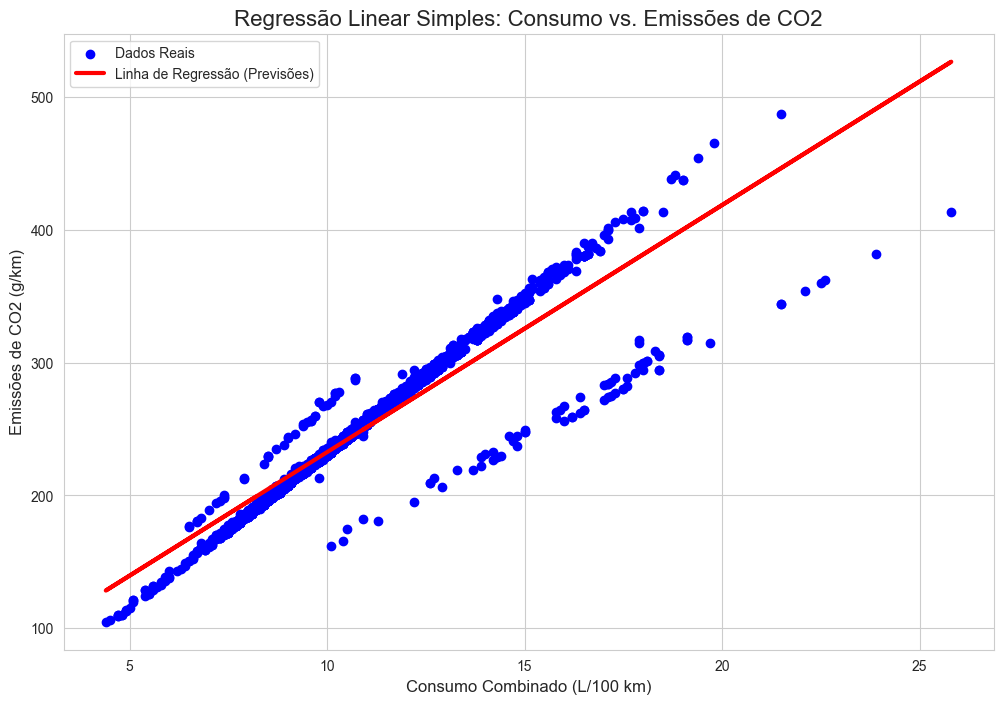

Coeficiente Angular (Slope): 18.59


In [162]:
X = df[['consumo_combinado_l_100km']]
y = df['emissoes_co2_g_km']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linha de Regressão (Previsões)')

plt.title('Regressão Linear Simples: Consumo vs. Emissões de CO2', fontsize=16)
plt.xlabel('Consumo Combinado (L/100 km)', fontsize=12)
plt.ylabel('Emissões de CO2 (g/km)', fontsize=12)
plt.legend()
plt.show()

print(f"Coeficiente Angular (Slope): {modelo.coef_[0]:.2f}")

## Descrição da Regressão Linear
- Pontos azuis: Representam os dados reais do dataset - um carro do conjunto de teste.
    - Sua posição no gráfico representa o consumo de combustivel (X) e sua emissão de CO2 (Y)
- Linha Vermelha: Modelo de regressão em si
    - Representa a previsão do modelo que o algoritmo calculou.
    - Para qualquer valor de consumo que eu escolha no eixo X a altura da linha naquele ponto é a emissão de CO2 o que o modelo prevê
- Slope: 
    - Para cada aumento de uma unidade em consumo as emissões de CO2 aumentam em 18.59.

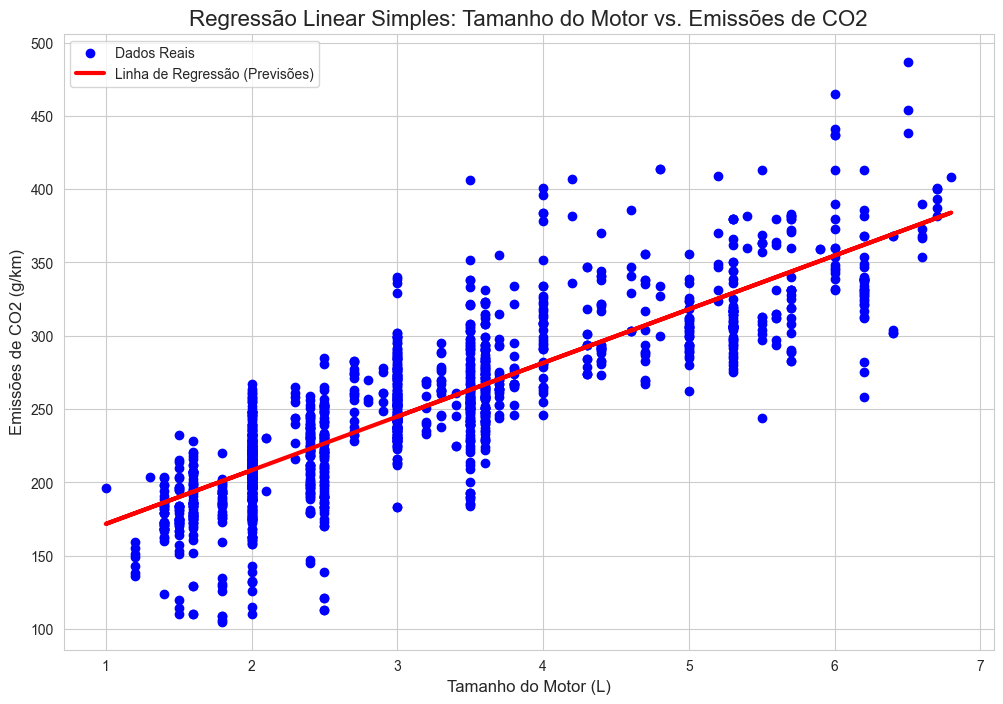

Coeficiente Angular (Slope): 36.61


In [156]:
X = df[['tamanho_motor_l']]
y = df['emissoes_co2_g_km']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linha de Regressão (Previsões)')

plt.title('Regressão Linear Simples: Tamanho do Motor vs. Emissões de CO2', fontsize=16)
plt.xlabel('Tamanho do Motor (L)', fontsize=12)
plt.ylabel('Emissões de CO2 (g/km)', fontsize=12)
plt.legend()
plt.show()

print(f"Coeficiente Angular (Slope): {modelo.coef_[0]:.2f}")

Pontos azuis estão um pouco mais espalhados ao redor da linha vermelha neste gráfico do que no gráfico anterior.
Embora o tamanho do motor seja um ótimo preditor, ele é um pouco menos preciso que o consumo de combustível. Para um mesmo tamanho de motor, existe uma variedade maior de emissões de CO2 possíveis.  
  
O que faz sentido pois dois carros podem ter o mesmo motor de 2.0L, mas um pode ser mais pesado ou ter uma transmissão menos eficiente, fazendo com que consuma e emita mais. O consumo de combustível é uma medida mais direta do que está sendo queimado.

---

# Testes de Hipótese

## Teste T: Emissões de CO2 por Tipo de Transmissão

- **Hipótese Nula (H₀):** A média de emissões de CO2 é a mesma para veículos com transmissão automática e manual.
- **Hipótese Alternativa (H₁):** A média de emissões de CO2 é diferente entre os dois grupos.

P-valor: 2.2210523893470837e-53
P-valor: 0.00000


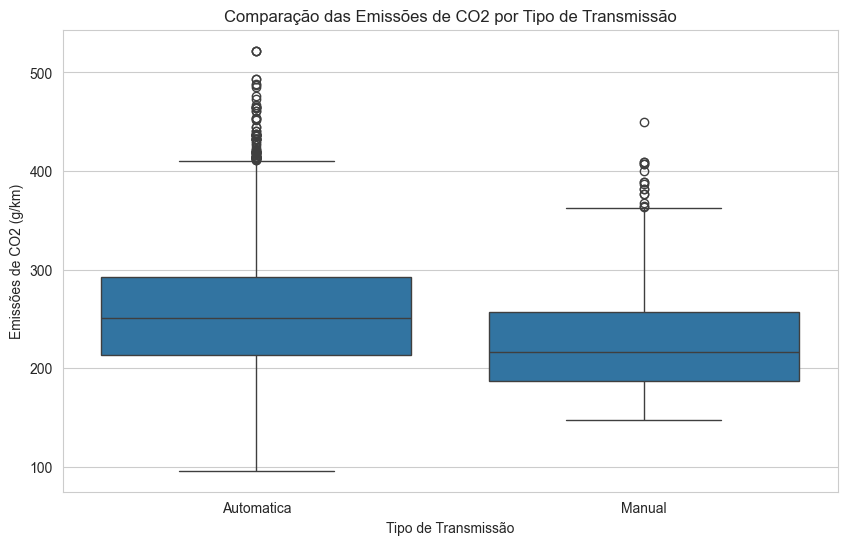

In [157]:

emissoes_automatica = df[df['tipo_transmissao'] == 'Automatica']['emissoes_co2_g_km']
emissoes_manual = df[df['tipo_transmissao'] == 'Manual']['emissoes_co2_g_km']

p_valor = sts.ttest_ind(emissoes_automatica, emissoes_manual, equal_var=False).pvalue

print(f"P-valor: {p_valor}")
print(f"P-valor: {p_valor:.5f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_transmissao', y='emissoes_co2_g_km', data=df)
plt.title('Comparação das Emissões de CO2 por Tipo de Transmissão')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Emissões de CO2 (g/km)')
plt.show()


Nesse caso, nós rejeitamos a hipótese nula. Pois, existe uma deferença estatisticamente significativa de emissão de CO2 entre veículos com transmissão manual e automática.
$$H0 = MA == MM$$
$$H1 = MA != MM$$

## Teste T: Emissões de CO2 entre as classes 'SUV' e 'COMPACT'

Agora, vamos investigar se existe uma diferença estatisticamente significativa na média de emissões de CO2 entre veículos da classe **SUV** e veículos da classe **COMPACT**.

- **Hipótese Nula (H₀):** A média de emissões de CO2 é a mesma para as classes 'SUV' e 'COMPACT'.
- **Hipótese Alternativa (H₁):** A média de emissões de CO2 é diferente entre os dois grupos.

Novamente, usaremos um nível de significância (alfa) de 0.05.

P-valor: 2.27569174184288e-26


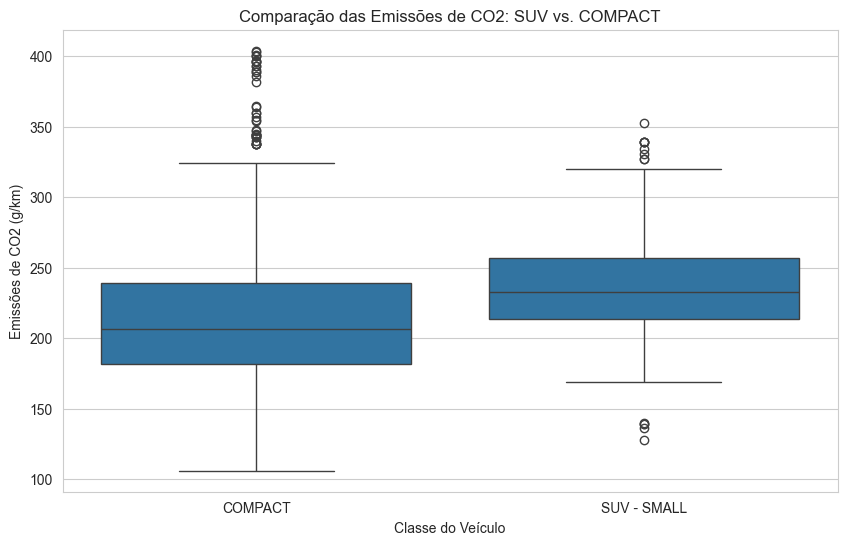

In [158]:

df_suv_compact = df[df['classe_veiculo'].isin(['SUV - SMALL', 'COMPACT'])]

emissoes_suv = df_suv_compact[df_suv_compact['classe_veiculo'] == 'SUV - SMALL']['emissoes_co2_g_km']
emissoes_compact = df_suv_compact[df_suv_compact['classe_veiculo'] == 'COMPACT']['emissoes_co2_g_km']

p_valor = sts.ttest_ind(emissoes_suv, emissoes_compact, equal_var=False).pvalue

print(f"P-valor: {p_valor}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='classe_veiculo', y='emissoes_co2_g_km', data=df_suv_compact)
plt.title('Comparação das Emissões de CO2: SUV vs. COMPACT')
plt.xlabel('Classe do Veículo')
plt.ylabel('Emissões de CO2 (g/km)')
plt.show()


A partir do teste. Rejeitamos a hipotese nula. Há uma diferença estatísticamente significativa nas emissões de CO2 entre esses veívulos 

## Teste de Correlação de Pearson: Emissões vs. Consumo

Vamos usar o teste de correlação de Pearson para confirmar estatisticamente a força da relação linear entre as emissões de CO2 e o consumo de combustível.

- **Hipótese Nula (H₀):** Não existe correlação linear entre as emissões de CO2 e o consumo combinado (o coeficiente de correlação é 0).
- **Hipótese Alternativa (H₁):** Existe uma correlação linear entre as duas variáveis.

In [159]:
var1 = df['emissoes_co2_g_km']
var2 = df['consumo_combinado_l_100km']

p_valor = sts.pearsonr(var1, var2).pvalue

print(f"P-valor: {p_valor}")
print(f"P-valor: {p_valor:.5f}")

P-valor: 0.0
P-valor: 0.00000


A partir do teste, rejeitamos a hipótese nula, pois, existe uma correlação linear estatisticamente significativa entre as emissões de CO2 e o consumo de combustível. P-valor menor que 0.05

## Teste Qui-Quadrado (Chi²): Associação entre Classe do Veículo e Tipo de Transmissão

Teste Qui-Quadrado para verificar se existe uma associação estatisticamente significativa entre a `classe_veiculo` e o `tipo_transmissao`.

- **Hipótese Nula (H₀):** A classe do veículo e o tipo de transmissão são independentes (não há associação entre elas).
- **Hipótese Alternativa (H₁):** A classe do veículo e o tipo de transmissão são dependentes (existe uma associação).

In [160]:

tabela_contingencia = pd.crosstab(df['classe_veiculo'], df['tipo_transmissao'])
p_valor = sts.chi2_contingency(tabela_contingencia).pvalue

print("Tabela de Contingência:")
display(tabela_contingencia)

print(f"P-valor: {p_valor}")

Tabela de Contingência:


tipo_transmissao,Automatica,Manual
classe_veiculo,,
COMPACT,707,315
FULL-SIZE,608,31
MID-SIZE,942,191
MINICOMPACT,193,133
MINIVAN,76,4
PICKUP TRUCK - SMALL,118,41
PICKUP TRUCK - STANDARD,537,1
SPECIAL PURPOSE VEHICLE,77,0
STATION WAGON - MID-SIZE,50,3


P-valor: 1.9680575393061132e-170


Rejeitamos a hipótese nula, existe uma associação estatisticamente significativa entre a classe do veículo e o tipo de transmissão dele.

---

# Intervalos de Confiança

## Intervalo de Confiança para a Média de Emissões de CO2

Vamos calcular o intervalo de confiança de 95% para a média da variável `emissoes_co2_g_km`.

Isso nos dará uma faixa de valores dentro da qual podemos ter 95% de confiança de que a verdadeira média de emissões de CO2 de toda a "população" de carros (não apenas da nossa amostra) se encontra.

In [161]:

dados = df['emissoes_co2_g_km']
media_amostral = dados.mean()
desvio_padrao_amostral = dados.std()
n = len(dados)
erro_padrao = desvio_padrao_amostral / np.sqrt(n)

confianca = 0.95

graus_liberdade = n - 1
valor_critico = sts.t.ppf((1 + confianca) / 2, df=graus_liberdade)

margem_erro = valor_critico * erro_padrao

limite_inferior = media_amostral - margem_erro
limite_superior = media_amostral + margem_erro

print(f"Média Amostral de Emissões de CO2: {media_amostral:.2f} g/km")
print(f"Intervalo de Confiança (95%): [{limite_inferior:.2f}, {limite_superior:.2f}] g/km")

print(f"\nCom 95% de confiança, a verdadeira média de emissões de CO2 para todos os veículos está entre {limite_inferior:.2f} e {limite_superior:.2f} g/km.")


Média Amostral de Emissões de CO2: 250.58 g/km
Intervalo de Confiança (95%): [249.25, 251.92] g/km

Com 95% de confiança, a verdadeira média de emissões de CO2 para todos os veículos está entre 249.25 e 251.92 g/km.


---

# Propostas de Solução e Considerações Finais da Análise

A partir da análise do data set. Percebemos alguns padrões de comportamento e algumas variáveis dependentes que influenciam umas nas outras.

Propostas de Solução
**Para Consumidores**
- Nossa análise mostra, com 95% de confiança que veículos com transmissão automática emitem significativamente mais CO2. Cnsumidores preocupados com o ambiente, podem eventualmente optar por modelos manuais.  

**Políticas Públicas**
- A Regressão Linear mostra que o consumo de combustível e o tamanho do motor, são os principais preditores de emissões de CO2. Portanto, políticas de incentivo focadas nesses fatores seriam bastante eficazes para reduzir a emissão de CO2.

**Categoria de Veículos**
- O Teste T entre SUV e COMPACT confima que a classe de veículo tem um impacto significativo nas emissões. Por outro lado, o teste qui quadrado mostrou que exister uma ssociação entre classe do veículo e tipo de transmissão. Ou seja, um consumidor que escolhe um SUV provavelmente também terá uma transmissão automática. Resultando em maior emissão. Assim, as recomendações podem ser segmentadas as classes de veículo.

**Para Industria Automotiva**
- Incentivar a produção e marketing de veiculos que otimizem a eficiência independente da classe. Por exemplo, desenvolver SUVs com transmissões automáticas mais eficientes ou promover consumo de motores menores.


---